In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
df = DataFrame({'name': ['냉장고','TV','세탁기','에어프라이어','건조기','냉장고'],
               'price':[35,12,32,21,25,63]})
df

,name,price
0,냉장고,35
1,TV,12
2,세탁기,32
3,에어프라이어,21
4,건조기,25
5,냉장고,63


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder() #라벨인코더 객체 생성

In [5]:
le.fit(df.name)

LabelEncoder()

In [6]:
le.transform(df.name)

array([2, 0, 3, 4, 1, 2])

In [7]:
df['id'] = le.transform(df.name)
df

,name,price,id
0,냉장고,35,2
1,TV,12,0
2,세탁기,32,3
3,에어프라이어,21,4
4,건조기,25,1
5,냉장고,63,2


In [8]:
df2 = DataFrame({'name': ['냉장고','세탁기','에어프라이어','TV','건조기','TV'],
               'price':[35,12,32,21,25,63]})
df2

,name,price
0,냉장고,35
1,세탁기,12
2,에어프라이어,32
3,TV,21
4,건조기,25
5,TV,63


In [9]:
le2 = LabelEncoder()
le.transform(df2.name)

array([2, 3, 4, 0, 1, 0])

In [10]:
le.classes_

array(['TV', '건조기', '냉장고', '세탁기', '에어프라이어'], dtype=object)

In [11]:
le.transform(['TV','냉장고'])

array([0, 2], dtype=int64)

In [12]:
le.inverse_transform([0,1,2,3])

array(['TV', '건조기', '냉장고', '세탁기'], dtype=object)

In [13]:
#one hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe = OneHotEncoder()

In [16]:
df.name.values.reshape(-1,1)

array([['냉장고'],
       ['TV'],
       ['세탁기'],
       ['에어프라이어'],
       ['건조기'],
       ['냉장고']], dtype=object)

In [17]:
ohe.fit_transform(df.name.values.reshape(-1,1)).toarray()

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [18]:
from sklearn.preprocessing import LabelBinarizer

In [19]:
lb=LabelBinarizer()

In [20]:
DataFrame(lb.fit_transform(df.name))

,0,1,2,3,4
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,1,0,0,0
5,0,0,1,0,0


In [21]:
#one hot encoding 하는 가장 쉬운 방법
#pandas.get_dummies()
pd.get_dummies(df)

,price,id,name_TV,name_건조기,name_냉장고,name_세탁기,name_에어프라이어
0,35,2,0,0,1,0,0
1,12,0,1,0,0,0,0
2,32,3,0,0,0,1,0
3,21,4,0,0,0,0,1
4,25,1,0,1,0,0,0
5,63,2,0,0,1,0,0


In [22]:
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
iris_df = DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
ss.fit(iris_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
iris_ss = DataFrame(ss.transform(iris_df), columns = iris.feature_names)

In [29]:
iris_ss.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [30]:
iris_ss['sepal width (cm)'].sort_values().plot(kind='bar')

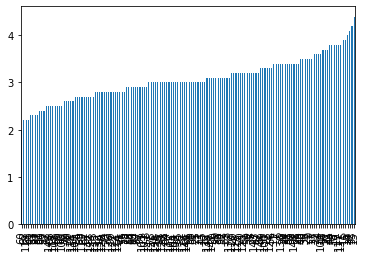

In [31]:
iris_df['sepal width (cm)'].sort_values().plot(kind='bar')

In [32]:
df = pd.read_csv('train.csv')

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
X_titanic_df = df.drop('Survived', axis = 1)
y_titanic_df = df.Survived

In [35]:
X_titanic_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
X_titanic_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
X_titanic_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [38]:
#불필요한 컬럼 삭제
X_titanic_df.drop(['PassengerId','Name','Cabin','Ticket'], axis = 1, inplace =True)

In [39]:
#문자열 피쳐를 숫자값으로 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_titanic_df['Sex'] = le.fit_transform(X_titanic_df.Sex)
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,S
1,1,0,38.0,1,0,71.2833,C
2,3,0,26.0,0,0,7.9250,S
3,1,0,35.0,1,0,53.1000,S
4,3,1,35.0,0,0,8.0500,S


In [40]:
X_titanic_df = pd.get_dummies(X_titanic_df)

In [41]:
#나이대 컬럼으로 변환

In [42]:
X_titanic_df.info()
#문자열 피쳐를 삭제
#X_titanic_df.drop(['Name','Sex','Ticket','Cabin','Embarked'],axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Pclass        891 non-null int64
Sex           891 non-null int32
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [43]:
#나이대별로 age처리
#0-5 baby, 6-12 child 13-18 teenager 19-25 student 26-35 young adult 36-60 adult
#61- elderly

import numpy as np

In [44]:
np.digitize([5,15,23,13],[0, 10, 20, 30])

array([1, 2, 3, 2], dtype=int64)

In [45]:
X_titanic_df.Age.fillna(X_titanic_df.Age.mean(), inplace = True)
X_titanic_df['Age'] = np.digitize(X_titanic_df.Age,[0, 6, 13, 19, 26, 36, 61])

In [46]:
#데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df)

In [47]:
from sklearn.tree import DecisionTreeClassifier
df_clf = DecisionTreeClassifier()
df_clf.fit(X_train,y_train)
df_clf.score(X_test,y_test)

0.8609865470852018

In [48]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

svm_clf = SVC()
svm_clf.fit(X_train,y_train)


lr_clf = LogisticRegression( max_iter=500)
lr_clf.fit(X_train,y_train)

print(svm_clf.score(X_test,y_test),lr_clf.score(X_test,y_test))

0.7982062780269058 0.820627802690583


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
dt_params = {'max_depth':[2,4,6],
            'min_samples_split':[3,5,7],
            'splitter':['best','random']}

In [51]:
grid_dt = GridSearchCV(df_clf, param_grid = dt_params, cv=5)

In [52]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_split': [3, 5, 7],
                         'splitter': ['best', 'random']

In [53]:
grid_dt.best_params_

{'max_depth': 4, 'min_samples_split': 5, 'splitter': 'random'}

In [54]:
grid_dt.score(X_train,y_train)

0.8068862275449101

In [55]:
import graphviz

In [56]:
best_dt = grid_dt.best_estimator_

In [57]:
best_dt.feature_importances_

array([0.18676317, 0.66481815, 0.0228628 , 0.01533012, 0.01976427,
       0.05369472, 0.        , 0.        , 0.03676678])

In [58]:
dt_imp = DataFrame({'feature' : X_titanic_df.columns,
          'importance' : best_dt.feature_importances_})

In [59]:
dt_imp.sort_values(by='importance', ascending = False)

,feature,importance
1,Sex,0.664818
0,Pclass,0.186763
5,Fare,0.053695
8,Embarked_S,0.036767
2,Age,0.022863
4,Parch,0.019764
3,SibSp,0.015330
6,Embarked_C,0.000000
7,Embarked_Q,0.000000


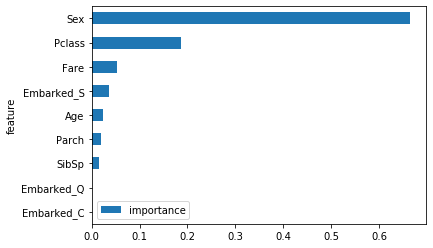

In [60]:
dt_imp.set_index('feature').sort_values(by='importance').plot(kind= 'barh');

In [61]:
# 결정트리 시각화
from sklearn import tree
dot_data = tree.export_graphviz(best_dt)

In [62]:
graph = graphviz.Source(dot_data)

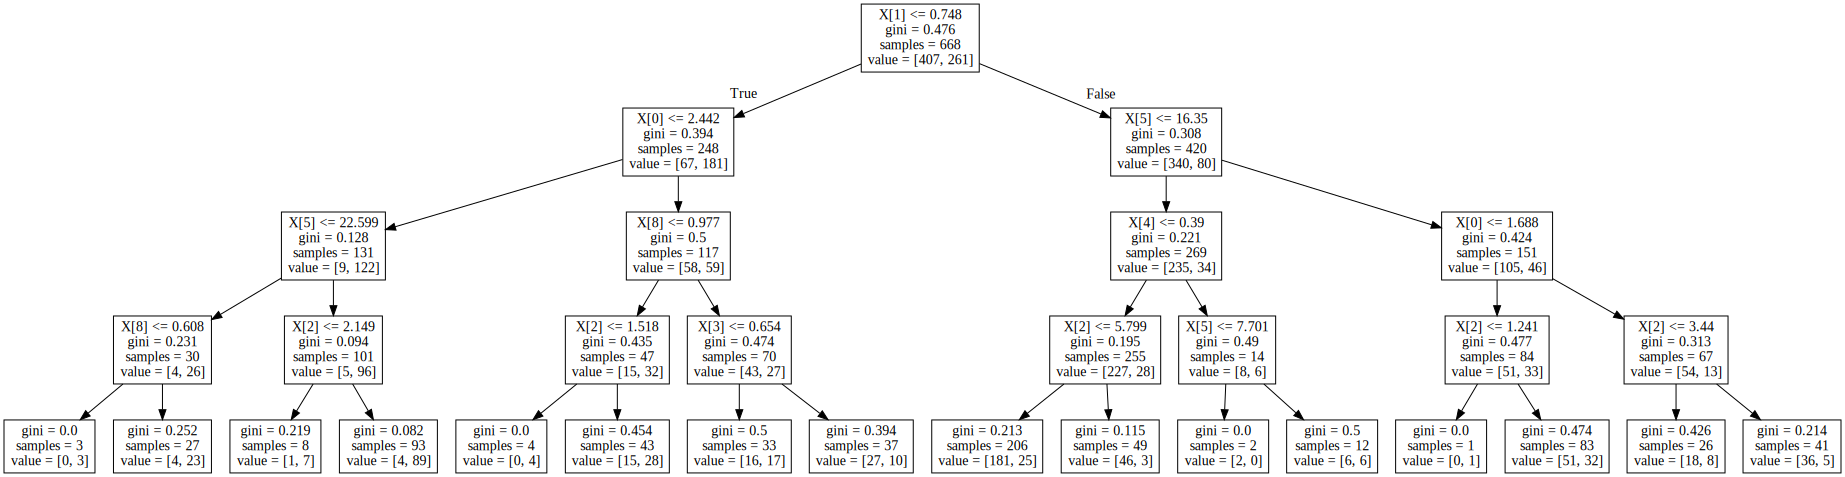

In [63]:
graph

In [64]:
#피쳐와 라벨을 기입하여 가독성 향상
dot_data = tree.export_graphviz(best_dt,
                               feature_names = X_titanic_df.columns,
                               class_names = ['Death','Survived'],
                               filled=True,
                                rounded=True
                               )

In [65]:
graph=graphviz.Source(dot_data)

In [66]:
graph.render('titanic')

'titanic.pdf'

In [67]:
dt1 = DecisionTreeClassifier(max_depth=2)
dt2 = DecisionTreeClassifier(max_depth=3, min_samples_split= 100)

In [68]:
dt1.fit(X_train,y_train)
dt2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
dot_data1 = tree.export_graphviz(dt1,
                               feature_names = X_titanic_df.columns,
                               class_names = ['Death','Survived'],
                               filled=True,
                                rounded=True
                               )

In [70]:
dot_data2 = tree.export_graphviz(dt2,
                               feature_names = X_titanic_df.columns,
                               class_names = ['Death','Survived'],
                               filled=True,
                                rounded=True
                               )

In [71]:
graph1=graphviz.Source(dot_data1)
graph2=graphviz.Source(dot_data2)

In [72]:
graph1.render('titanic1')
graph2.render('titanic2')

'titanic2.pdf'

In [73]:
import os

In [74]:
os.environ['PATH']

'C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\oraclexe\\app\\oracle\\product\\11.2.0\\server\\bin;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\iCLS Client\\;C:\\Program Files\\Intel\\iCLS Client\\;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0\\;C:\\Windows\\System32\\OpenSSH\\;C:\\Program Files\\Intel\\WiFi\\bin\\;C:\\Program Files\\Common Files\\Intel\\WirelessCommon\\;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\IPT;C:\\Program Files\\Git\\cmd;C:\\Program Files\\MiKTeX 2.9\\miktex\

In [75]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [76]:
data = load_breast_cancer()

In [77]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [78]:
data_df = pd.DataFrame(data.data, columns = data.feature_names)
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [79]:
#모델 객체 형성
lr_clf = LogisticRegression(solver = 'lbfgs', max_iter = 500)
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()

In [80]:
#개별모델을 voting에 추가
voting_clf = VotingClassifier(estimators= [('LR',lr_clf),
                                           ('KNN',knn_clf),
                                           ('TREE',dt_clf)])

In [81]:
voting_clf

VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=500,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

In [82]:
#학습/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [83]:
voting_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('LR',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=500,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                

In [84]:
voting_clf.score(X_test,y_test)

0.9370629370629371

In [85]:
for model in voting_clf.estimators_:
    print(model.__class__.__name__,model.score(X_test,y_test))

LogisticRegression 0.9300699300699301
KNeighborsClassifier 0.916083916083916
DecisionTreeClassifier 0.916083916083916


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [89]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_params ={
    'n_estimators':[100,300,500],
    'max_depth' : [3,5,7],
    'n_jobs':[-1]
}
grid_rf = GridSearchCV(rf_clf, param_grid= rf_params, cv =5)
grid_rf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

rf_clf.score(X_test, y_test)

0.965034965034965

In [91]:
best_dt = grid_rf.best_estimator_

In [125]:
rf_imp = pd.Series(best_dt.feature_importances_, index = data.feature_names)

In [127]:
rf_imp

mean radius                0.032145
mean texture               0.012637
mean perimeter             0.038973
mean area                  0.017538
mean smoothness            0.007364
mean compactness           0.006617
mean concavity             0.032069
mean concave points        0.097043
mean symmetry              0.003895
mean fractal dimension     0.003470
radius error               0.015030
texture error              0.002050
perimeter error            0.014000
area error                 0.033554
smoothness error           0.004372
compactness error          0.004483
concavity error            0.003505
concave points error       0.003190
symmetry error             0.003182
fractal dimension error    0.002869
worst radius               0.153052
worst texture              0.016943
worst perimeter            0.153640
worst area                 0.151415
worst smoothness           0.005928
worst compactness          0.013740
worst concavity            0.046725
worst concave points       0

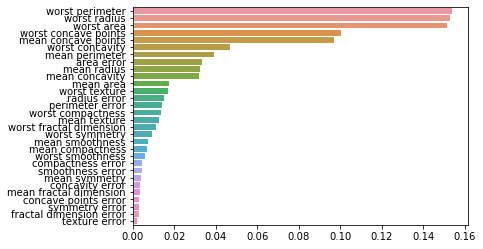

In [129]:
rf_imp.sort_values(inplace=True,as cending =False)
sns.barplot(x=rf_imp,y=rf_imp.index)

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

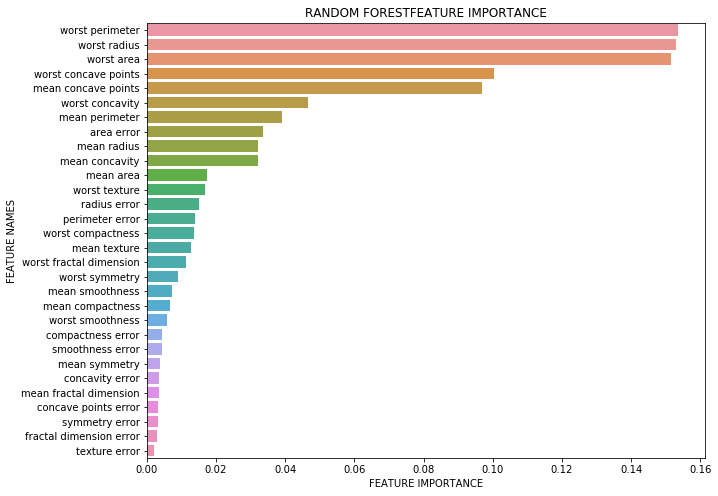

In [124]:
plot_feature_importance( best_dt.feature_importances_,data_df.columns,'RANDOM FOREST')

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
gb_clf = GradientBoostingClassifier()
gb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth':[3,5]
}
grid_gb = GridSearchCV(gb_clf, param_grid=gb_params, cv=5)
grid_gb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [145]:
grid_gb.score(X_test,y_test)

0.951048951048951

In [146]:
grid_gb.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}

In [147]:
grid_gb.best_estimator_.feature_importances_

array([2.24355598e-04, 3.11736284e-02, 3.49189581e-04, 3.06608270e-04,
       6.42174465e-04, 1.23512736e-03, 9.98996856e-03, 4.79200081e-02,
       0.00000000e+00, 3.01089811e-04, 3.03179015e-03, 3.12210841e-04,
       1.55812285e-03, 2.01798270e-02, 1.42564199e-03, 8.20063549e-03,
       2.08970881e-03, 5.72326382e-03, 1.94865820e-03, 1.74223129e-03,
       4.47255262e-01, 8.89536472e-03, 2.42152779e-01, 4.30967997e-02,
       1.26049917e-02, 1.39195345e-03, 7.18901774e-03, 9.80580233e-02,
       5.57397359e-04, 4.44170206e-04])

XGBoost

In [149]:
import xgboost as xgb

In [150]:
xgb.__version__

'1.1.1'

In [151]:
from xgboost import XGBClassifier

In [152]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.05)

In [153]:
evals = [(X_test, y_test)]

xgb_clf.fit(X_train, y_train, early_stopping_rounds = 400, eval_set = evals,
           eval_metric = 'logloss',verbose = True)

[0]	validation_0-logloss:0.65415
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.61890
[2]	validation_0-logloss:0.58571
[3]	validation_0-logloss:0.55583
[4]	validation_0-logloss:0.52826
[5]	validation_0-logloss:0.50247
[6]	validation_0-logloss:0.47898
[7]	validation_0-logloss:0.45681
[8]	validation_0-logloss:0.43640
[9]	validation_0-logloss:0.41767
[10]	validation_0-logloss:0.40048
[11]	validation_0-logloss:0.38414
[12]	validation_0-logloss:0.36952
[13]	validation_0-logloss:0.35436
[14]	validation_0-logloss:0.34083
[15]	validation_0-logloss:0.32833
[16]	validation_0-logloss:0.31753
[17]	validation_0-logloss:0.30621
[18]	validation_0-logloss:0.29596
[19]	validation_0-logloss:0.28646
[20]	validation_0-logloss:0.27697
[21]	validation_0-logloss:0.26770
[22]	validation_0-logloss:0.25844
[23]	validation_0-logloss:0.25126
[24]	validation_0-logloss:0.24478
[25]	validation_0-logloss:0.23724
[26]	validation_0-logloss:0.23090
[27]	validation_0-loglo

[236]	validation_0-logloss:0.05830
[237]	validation_0-logloss:0.05803
[238]	validation_0-logloss:0.05815
[239]	validation_0-logloss:0.05815
[240]	validation_0-logloss:0.05794
[241]	validation_0-logloss:0.05779
[242]	validation_0-logloss:0.05777
[243]	validation_0-logloss:0.05763
[244]	validation_0-logloss:0.05751
[245]	validation_0-logloss:0.05763
[246]	validation_0-logloss:0.05737
[247]	validation_0-logloss:0.05736
[248]	validation_0-logloss:0.05722
[249]	validation_0-logloss:0.05734
[250]	validation_0-logloss:0.05714
[251]	validation_0-logloss:0.05713
[252]	validation_0-logloss:0.05719
[253]	validation_0-logloss:0.05699
[254]	validation_0-logloss:0.05685
[255]	validation_0-logloss:0.05684
[256]	validation_0-logloss:0.05671
[257]	validation_0-logloss:0.05660
[258]	validation_0-logloss:0.05672
[259]	validation_0-logloss:0.05647
[260]	validation_0-logloss:0.05658
[261]	validation_0-logloss:0.05658
[262]	validation_0-logloss:0.05643
[263]	validation_0-logloss:0.05632
[264]	validation_0-l

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [156]:
xgb_params = {
    'n_estimators': [100, 300],
    'max_depth':[3,5]
}
grid_xgb = GridSearchCV(xgb_clf, param_grid = xgb_params, cv=5)

In [157]:
grid_xgb.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=6, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=400, n_jobs=0,
                                     num_parallel_tree=1,
                                     objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                   

In [161]:
xgb_clf.feature_importances_

array([3.2208294e-02, 1.3912227e-02, 3.8694902e-04, 4.3687900e-03,
       3.8585693e-03, 2.8165628e-03, 2.1342598e-02, 2.2963222e-02,
       1.0264558e-03, 1.5449497e-03, 1.0321505e-02, 4.4674617e-03,
       1.0790168e-02, 6.5858774e-03, 4.8200130e-03, 5.4948567e-03,
       8.2104411e-03, 3.9891019e-03, 2.5869717e-03, 3.4205113e-03,
       4.9953550e-01, 1.1432419e-02, 2.2598001e-01, 2.0126682e-02,
       6.7826943e-03, 6.1179944e-03, 8.8730827e-03, 4.6645604e-02,
       5.0849509e-03, 4.3054535e-03], dtype=float32)

In [180]:
from xgboost import plot_importance
from xgboost import DMatrix

In [221]:
xgb_clf.columns=a

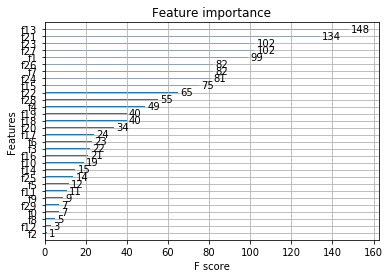

In [222]:
plot_importance(xgb_clf)

In [218]:
a=list()
for i in range(len(data_df.columns)):
    a.append(data_df.columns[:][i])

In [219]:
a

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']